In [22]:
import numpy as np
from sklearn import datasets
boston = datasets.load_boston()#从sklearn的数据库输入load_boston的数据

## 数据集说明
波士顿房价数据集包含506个样本，每个样本有14个属性。这些属性包括：
- CRIM：城镇人均犯罪率
- ZN：占地面积超过25,000平方英尺的住宅用地比例
- INDUS：城镇非零售业务地区的比例
- CHAS：查尔斯河虚拟变量（如果临河为1，否则为0）
- NOX：一氧化氮浓度（每千万分之一）
- RM：住宅平均房间数
- AGE：1940年以前建成的自住单位比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：径向公路的可达性指数
- TAX：每10,000美元的全额物业税率
- PTRATIO：城镇师生比例
- B：1000(Bk - 0.63)^2，其中Bk是城镇黑人比例
- LSTAT：人口中地位较低人群的百分比
- MEDV：自住房屋的中位数价值（单位：千美元）

### 加载数据并划分训练集/测试集

In [9]:
x,y=boston.data,boston.target #x是特征（自变量）(二维数组,有样本数和特征数)，y是预测值（因变量）

np.random.seed(42)            #设置了随机数生成的种子（想象一下我的世界的种子），确保每次运行代码时生成的随机数序列都是相同的
indices=np.random.permutation(len(x)) #会生成一个 0 到 len(X)-1 的整数数组，并且打乱这些整数的顺序，但x为二维数组，他只进行行打乱
train_size=int(0.7*len(x))    #计算训练集的大小
x_train,x_test=x[indices[:train_size]],x[indices[train_size:]] #根据 indices 列表的顺序来划分 X（特征数据）为训练集和测试集。
y_train,y_test=y[indices[:train_size]],y[indices[train_size:]] #根据 indices 列表的顺序来划分 Y（房价值）为训练集和测试集。

In [10]:
# 计算训练集的均值和标准差
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

# 特征缩放训练集和测试集(Z-Score 归一化)
x_train_scaled=(x_train-mean)/std
x_test_scaled =(x_test - mean)/std

# 加一列常数β
x_train_final=np.hstack([np.ones((x_train_scaled.shape[0],1)),x_train_scaled])
x_test_final=np.hstack([np.ones((x_test_scaled.shape[0],1)),x_test_scaled])

### 实现多元线性回归类

In [19]:
class LinearRegression:
    def __init__(self,learning_rate=0.01,max_iteration=1000,tol=1e-4):
        self.learning_rate=learning_rate
        self.max_iteration=max_iteration
        self.tol=tol
        self.theta=None
        self.loss_history=[]
        
    def fit(self,x,y):
        m,n=x.shape
        self.theta=np.zeros(n)
        for _ in range(self.max_iteration):
            y_pred=x @ self.theta
            error=y_pred-y
            loss=(error**2).mean()
            self.loss_history.append(loss)
                
            gradient=(x.T @ error)/m
                
            self.theta-=self.learning_rate*gradient
                
            if len(self.loss_history)>1 and abs(self.loss_history[-2]-self.loss_history[-1])<self.tol:
                break
        return self
    def predict(self,x):
        return x @ self.theta
    
    def score(self,x,y):
        y_pred=self.predict(x)
        ss_res=((y-y_pred)**2).sum()
        ss_tot=((y-y.mean())**2).sum()
        return 1-(ss_res/ss_tot)

### 模型训练与评估

In [20]:
# 使用梯度下降训练模型
model_gradient = LinearRegression(learning_rate=0.01, max_iteration=10000, tol=1e-6)
model_gradient.fit(x_train_final, y_train)
print(f"梯度下降测试集R²分数: {model_gradient.score(x_test_final, y_test):.4f}")  

梯度下降测试集R²分数: 0.7272


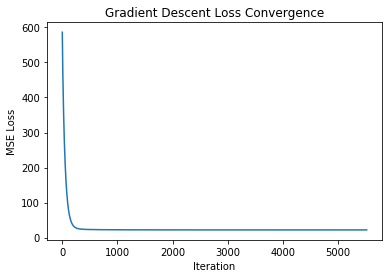

In [18]:
import matplotlib.pyplot as plt
plt.plot(model_gradient.loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Loss Convergence")
plt.show()

In [ ]:
#从每一个特征（自变量，即除了MEDV）搞一副散点图
for feature in boston.columns[:-1]:
    # 创建图形和坐标轴
    plt.figure(figsize=(10, 6))
    plt.scatter(boston[feature], boston['MEDV'], color='red', label=f'{feature} vs MEDV')
    plt.title(f'{feature} vs MEDV', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('MEDV', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 读取波士顿房价数据集
boston = pd.read_csv("boston.csv") 

# 查看数据集的前5行
print(boston.head())
print("******************************************************")#我是分割线
# 查看数据集的基本信息（可用于检测是否有空值/数值类型为多少）
print(boston.info())
print("******************************************************")#我也是分割线
# 查看数据集的统计描述
print(boston.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PIRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
******************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 n

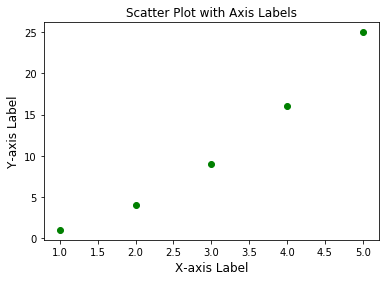

In [ ]:
# 随机抽取训练集
x_train = x.sample(frac=1 - test_size, random_state=42)

# 剩余数据作为测试集
x_test = x.drop(x_train.index)

# 对应的目标变量也要进行类似的划分
y_train = y[x_train.index]
y_test = y[x_test.index]